In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [27]:
# encode each bandit are samples from some distrabtion, 
class normal_bandit:
    def __init__(self, mean_, std_):
        self.mean = mean_
        self.std = std_

    def sample(self):
        return np.random.normal(self.mean, self.std)
    
# EASY, all normal distrabutions with different parameters.
BANDITS = []
MEANS = []
for i in range(10):
    # b_i_mean = np.random.uniform(-3, 3)
    b_i_mean = np.random.normal(0,1)
    MEANS.append(b_i_mean)
    BANDITS.append(normal_bandit(b_i_mean, 1))
print(MEANS)

def make_random_bandit(k):
    BANDITS = []
    for i in range(k):
        # b_i_mean = np.random.uniform(-3, 3)
        b_i_mean = np.random.normal(0,1)
        BANDITS.append(normal_bandit(b_i_mean, 1))
    return BANDITS

[-0.6411475827142517, -1.4941596268205872, -2.2437047760019806, -0.5366981278513001, -1.1148602144058088, -2.130485069381638, 0.8232419596980463, -0.2841542092812961, -1.482770461093243, -0.8206719500642761]


In [15]:
# HARDER, using different type of distrabutions

Setting up the problem

Amassed: -1000.3815489531861 in 1000 moves !


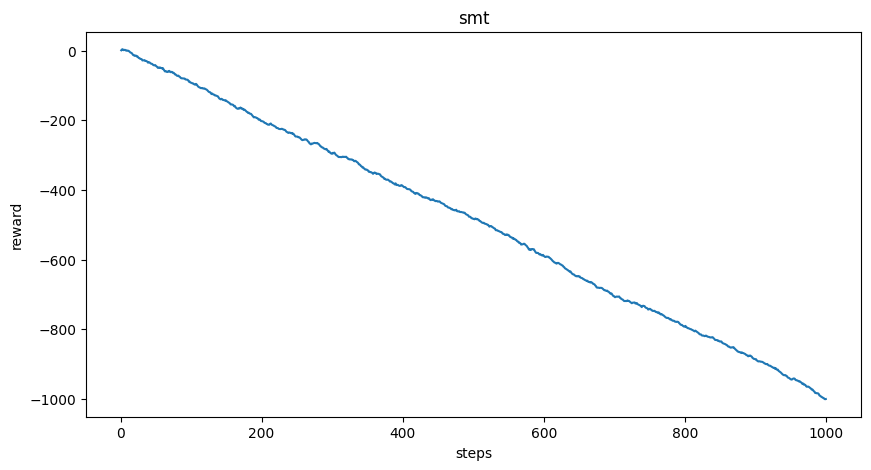

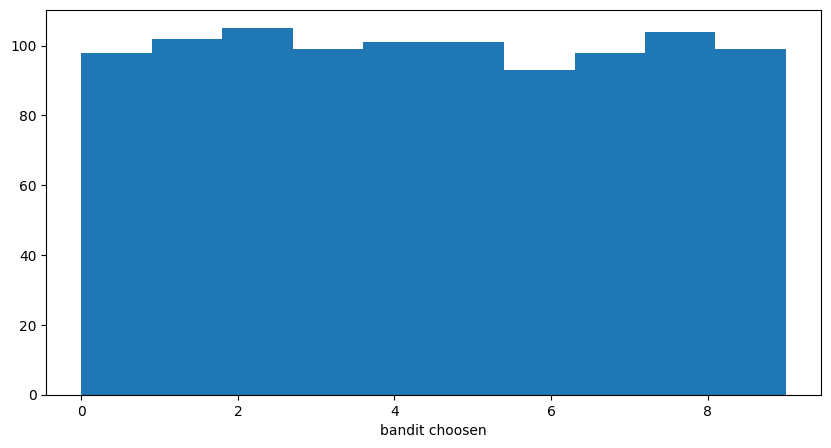

In [30]:
prev_estimates = [[]] * 10 # the estimate funciton  # future idea, 
estimate = [0] * 10 #future idea, use random initial estimate
reward = 0 # we seek to maximize 
reward_record = [] # for visual later
choice_record = []
epsilon = 0.3 # can be anything between [0,1)
T = 1000


def greedy_pick(estimate):
    return np.argmax(estimate)

def explore_pick():
    return np.random.randint(len(BANDITS))

def update_estimate(i, new, prev_estimates):
    n = len(prev_estimates[i]) + 1
    return np.sum(prev_estimates[i]) + new / n 

# main loop
# fist one is done at random

i = explore_pick()
# print(i)
x = BANDITS[i].sample()
estimate[i] = update_estimate(i, x, prev_estimates)
prev_estimates[i].append(x)
reward += x
for t in range(T):
    if(random.uniform(0,1) < epsilon): # greedy pick
        i = explore_pick()
    else:                              # explorertory pick
        i = greedy_pick(estimate)

    x = BANDITS[i].sample()
    estimate[i] = update_estimate(i, x, prev_estimates)
    prev_estimates[i].append(x)
    reward += x
    reward_record.append(reward)
    choice_record.append(i)


print("Amassed:", reward, "in", len(reward_record), "moves !")
X = np.arange(1,1001) 
Y = reward_record

plt.figure(figsize=(10, 5))
plt.xlabel("steps")
plt.ylabel("reward")
plt.plot(X,Y)
plt.title("smt")

# bandit choice
plt.figure(figsize=(10, 5))
plt.xlabel("bandit choosen")
plt.hist(choice_record)
plt.show()


# change in estimate



In [17]:
def run(RUNS, T, K, EPSILON):
    REWARDS = []
    REWARDS_CHANGE = []
    
    for r in range(RUNS):
        BANDITS = make_random_bandits(K)
        prev_estimates = [[]] * K # the estimate funciton  # future idea, 
        estimate = [0] * K #future idea, use random initial estimate
        reward = 0 # we seek to maximize 
        reward_record = [] # for visual later
        choice_record = []
        epsilon = EPSILON # can be anything between [0,1)

        for t in range(T):
            i = explore_pick()
            # print(i)
            x = BANDITS[i].sample()
            estimate[i] = update_estimate(i, x, prev_estimates)
            prev_estimates[i].append(x)
            reward += x
            for t in range(T):
                if(random.uniform(0,1) < epsilon): # explorertory pick
                    i = explore_pick()
                else:                              # greedy pick
                    i = greedy_pick(estimate)
        
            x = BANDITS[i].sample()
            estimate[i] = update_estimate(i, x, prev_estimates)
            prev_estimates[i].append(x)
            reward += x
            reward_record.append(reward)
            choice_record.append(i)


        REWARDS.append(reward)
        REWARDS_CHANGE.append(reward_record)


    return REWARDS_CHANGE

In [18]:
Y = run(100, 1000, 10, 0.3)

NameError: name 'make_random_bandits' is not defined

In [ ]:
what = [row[column] for row in Y]
print(what)

In [21]:
# none stationary bandits

# still using a normal distrabutions
class nonstationary_bandit:
    def __init__(self, mean_, std_, bias_):
        self.bias = bias_ # will be an increase that will be the sum of "random walks"
        self.mean = mean_
        self.std = std_

    def sample(self):
        self.bias += np.random.normal(0, 0.1)
        return np.random.normal(self.mean, self.std) + self.bias


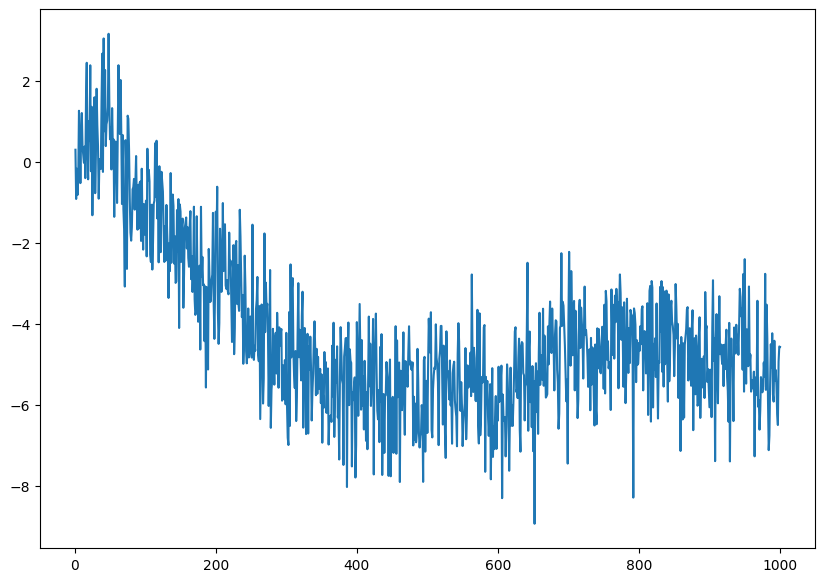

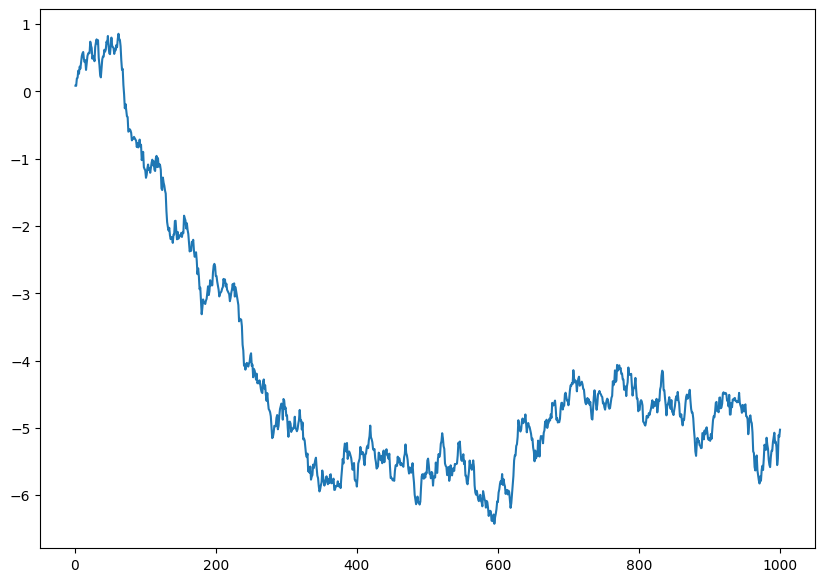

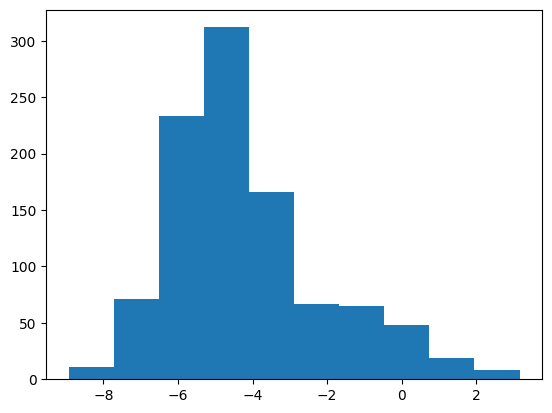

In [25]:
b1 = nonstationary_bandit(0,1,0)
Y = []
bY = []
for i in range(1000):
    Y.append(b1.sample())
    bY.append(b1.bias)

X = np.arange(1,1001) 

plt.figure(figsize=(10,7))
plt.plot(X,Y)
plt.show()

plt.figure(figsize=(10,7))
plt.plot(X,bY)
plt.show()


plt.hist(Y)
plt.show()

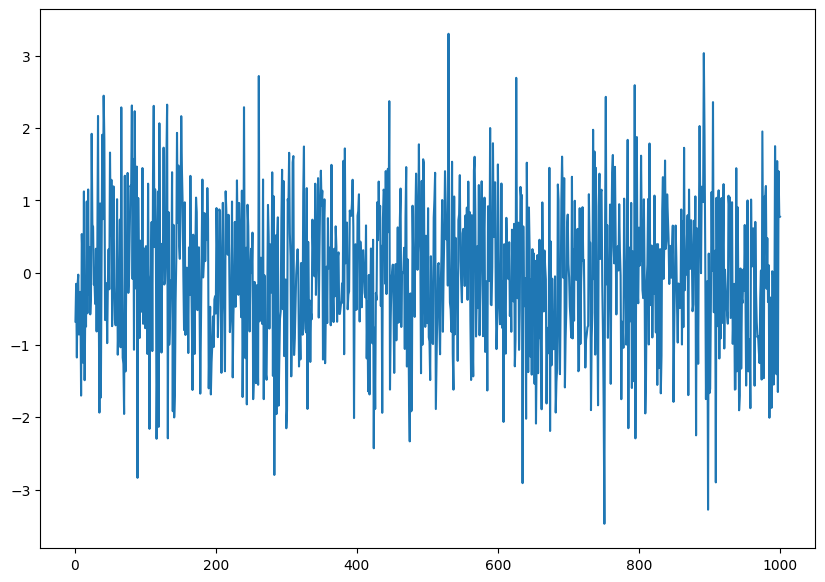

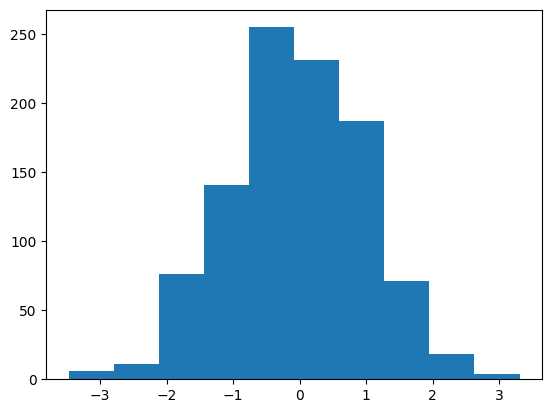

In [354]:
b2 = normal_bandit(0,1)

Y = []
for i in range(1000):
    Y.append(b2.sample())

X = np.arange(1,1001) 

plt.figure(figsize=(10,7))
plt.plot(X,Y)
plt.show()


plt.hist(Y)
plt.show()